# Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Load the dataset into python environment

In [2]:
#Reading the dataset to the python environment
titanic_data=pd.read_csv('titanic_dataset.csv')
#displaying  top 5  rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.Make ‘PassengerId’ as the index column

In [3]:
titanic_data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
#To know data types of each columns and checking for null values in the columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  
    
- This dataset contains details of passengers of Titanic Ship<br> 
- we have details of 891 passengers <br> 
- There are 11 columns/features/details   <br>  
- 2 of the features are floats, 4 are integers and 5 are objects. .<br> 
- Also there are some empty/NaN values present in the dataset in the columns of "Age","Cabin","Embarked". <br>  
    
Below I have listed some of the features with a short description:<br>     
1. pclass:    Ticket class  <br>      
2. sibsp:    # of siblings / spouses aboard the Titanic   <br>    
3. parch:    # of parents / children aboard the Titanic  <br>     
4. embarked:    Port of Embarkation <br>  
    
</div>

In [5]:
titanic_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Andrew, Mr. Edgardo Samuel",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<div class="alert alert-block alert-info"><b>Stats:</b><br>  
      
- passengers in this dataset  are mostly males (577/891)<br> 
- Average age of passengers in this dataset is 30<br>     
- Average Fare of passengers in this dataset is 32 <br>
- We can also see that the passenger ages range from 0.4 to 80. <br>   
- 38% out of the passengers in this dataset survived the Titanic.  <br>   
</div>

### 4. Fill in all the missing values present in all the columns in the dataset

In [6]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = round(titanic_data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


<div class="alert alert-block alert-info"><b>Find:</b><br>  
      
- 'Embarked' feature has 2 missing values. <br> 
- 'Age' feature has 177 missing values. <br> 
- 'Cabin’ feature  has 687 missing values (77 % of data are missing)<br> 
</div>

##### Filling  missing values in 'Embarked' feature

**the Embarked feature is a cateogical feature and has only 2 missing values, we will just fill these with the most common one.**

In [7]:
titanic_data['Embarked'].mode()

0    S
dtype: object

In [8]:
# fill NaN with most_embarked value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

#### Filling missing values in 'Age' feature

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

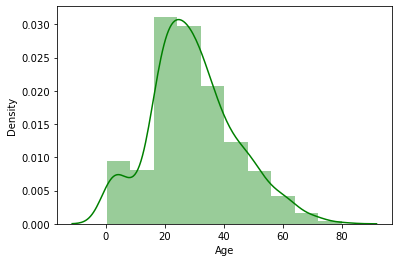

In [9]:
#kde plot of age
sns.distplot(titanic_data.Age,bins=10,color="green",hist=True)

**Here Distribution is skewed ,so 'Age' is filling with median values**

In [10]:
titanic_data['Age'].median()

28.0

In [11]:
# fill NaN with median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

#### Filling missing values in 'Cabin' feature

In [12]:
titanic_data.Cabin.describe(include = ['O'])

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

    687 missing values in cabin column
    147 unique values in cabin column
    Cabin column is a categorical feature
    We will fill Cabin with “U” for unknown

In [13]:
# fill Cabin NaN with U for unknown
titanic_data['Cabin'] = titanic_data['Cabin'].fillna("U")

In [14]:
#checking for null values
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Note:
    
No Null values in any columns

### 5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### 1.Age

Text(0.5, 1.0, 'Age')

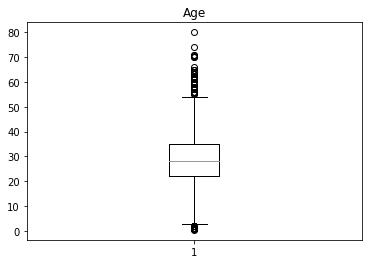

In [16]:
#to know outliers in age feature using boxplot
plt.boxplot(titanic_data['Age'])
plt.title('Age')

Note:

There are outliers

In [17]:
#defining quantiles,IQR,Lower limit,Upper limit 
Q1=np.percentile(titanic_data['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Age'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)

IQR=Q3-Q1
print("IQR",IQR)

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)

Q1 22.0
Q2 28.0
Q3 35.0
IQR 13.0
Lower limit 2.5
Upper Limit 54.5


In [18]:
outlier=[]
for x in titanic_data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('count :', len(outlier))
print("outliers",(outlier))

count : 66
outliers [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


In [19]:
index=titanic_data['Age'][(titanic_data['Age']>up_lim)|(titanic_data['Age']<low_lim)].index
#droping values lower than lower limit and upper than upper limit
titanic_data.drop(index,inplace=True)

Text(0.5, 1.0, 'Age')

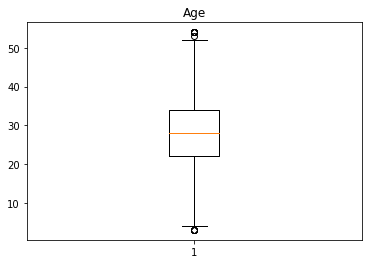

In [20]:
#checking for outliers again
plt.boxplot(titanic_data['Age'])
plt.title('Age')

Note;

Outliers reduced in 'Age' Feature

#### 2.Fare

Text(0.5, 1.0, 'Fare')

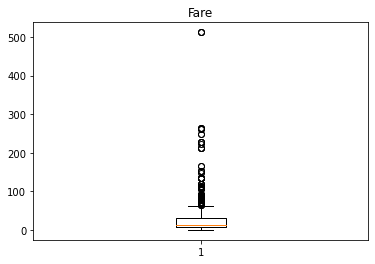

In [21]:
#to know outliers in age feature using boxplot
plt.boxplot(titanic_data['Fare'])
plt.title('Fare')

Note:

There are outliers

In [22]:
#defining quantiles,IQR,Lower limit,Upper limit 
Q1=np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Fare'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)

IQR=Q3-Q1
print("IQR",IQR)

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)

Q1 7.8958
Q2 13.4167
Q3 30.0708
IQR 22.174999999999997
Lower limit -25.366699999999994
Upper Limit 63.333299999999994


In [23]:
outlier=[]
for x in titanic_data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('count is:', len(outlier))
print("outliers",(outlier))

count is: 107
outliers [63.3583, 65.0, 65.0, 66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 120.0, 120.0, 120.0, 120.0, 133.65, 133.65, 134.5, 134.5, 135.6333, 135.6333, 135.6333, 146.5208, 151.55, 151.55, 153.4625, 153.4625, 164.8667, 164.8667, 211.3375, 211.3375, 211.3375, 211.5, 221.7792, 227.525, 227.525, 227.525, 227.525, 247.5208, 247.5208, 262.375, 262.375, 263.0, 263.0, 263.0, 512.3292, 512.3292, 512.3292]


In [24]:
index=titanic_data['Fare'][(titanic_data['Fare']>up_lim)|(titanic_data['Fare']<low_lim)].index
#droping values lower than lower limit and upper than upper limit
titanic_data.drop(index,inplace=True)

Text(0.5, 1.0, 'Fare')

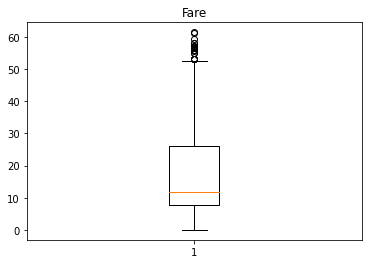

In [25]:
#to know outliers in age feature using boxplot
plt.boxplot(titanic_data['Fare'])
plt.title('Fare')

Note;

Outliers reduced in 'Age' Feature

#### 3.SibSp

Text(0.5, 1.0, 'SibSp')

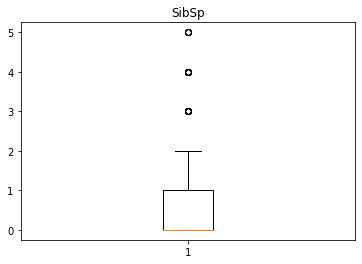

In [26]:
#to know outliers in SibSp feature using boxplot
plt.boxplot(titanic_data['SibSp'])
plt.title('SibSp')

In [27]:
#defining quantiles,IQR,Lower limit,Upper limit 
Q1=np.percentile(titanic_data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['SibSp'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)

IQR=Q3-Q1
print("IQR",IQR)

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)

Q1 0.0
Q2 0.0
Q3 1.0
IQR 1.0
Lower limit -1.5
Upper Limit 2.5


In [28]:
outlier=[]
for x in titanic_data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('count is:', len(outlier))
print("outliers",(outlier))

count is: 29
outliers [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]


In [29]:
#droping values lower than lower limit and upper than upper limit
index=titanic_data['SibSp'][(titanic_data['SibSp']>up_lim)|(titanic_data['SibSp']<low_lim)].index
titanic_data.drop(index,inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

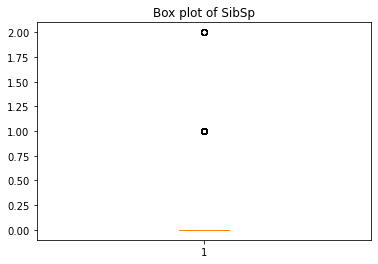

In [30]:
#  boxplot to check outliers again
plt.boxplot(titanic_data['SibSp'])
plt.title('Box plot of SibSp')

In [33]:
titanic_data.shape

(689, 11)

Note:


Outliers reduced in 'SibSp' Feature

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [34]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [35]:
#removing object type features
titanic_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


#### one hot encoding

In [36]:
#sex,Embarked are categorical features 
#using one hot encoding for these features

data2=pd.get_dummies(titanic_data)
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


<AxesSubplot:>

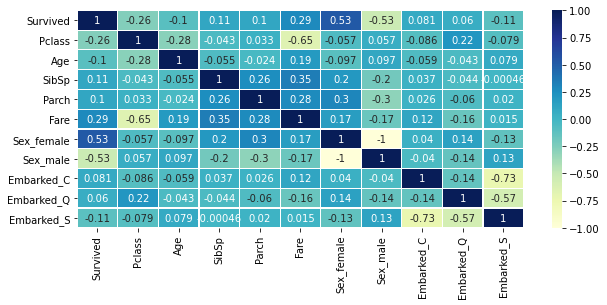

In [37]:
corrmatrix=data2.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,linewidths=0.2,cmap='YlGnBu')

before Scaling

In [38]:
x=data2.drop('Survived',axis=1)
y=data2['Survived']
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.723586,9.545220,0.501020,0.754625,13.092563,0.463665,0.463665,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

print("MSE is " ,mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is  0.1485999083011544
R squared value is : 0.36646059037816947


### min max scaling

In [40]:
x=data2.drop('Survived',axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.723586,9.545220,0.501020,0.754625,13.092563,0.463665,0.463665,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.361793,0.187161,0.25051,0.125771,0.213306,0.463665,0.463665,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.00000,0.000000,0.171068,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.00000,0.000000,0.382051,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

print("MSE is " ,mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is  0.1498678571226969
R squared value is : 0.3610548296545306


<div class="alert alert-block alert-info"><b>Note:</b><br>  
    
- Values of MSE & R2 havent much changed after doing min max scaling      <br> 
-  Here Value of Mean Squared Error & r2 are  minimal values so this model is a good /stable one<br>  
    
</div>

Submitted by-

`Kevin M
 DSA Norka B3 2021`

---
___

***